In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("House_rent.csv")

In [3]:
dataset

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [4]:
dataset.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

# 1. What is the distribution of rent?

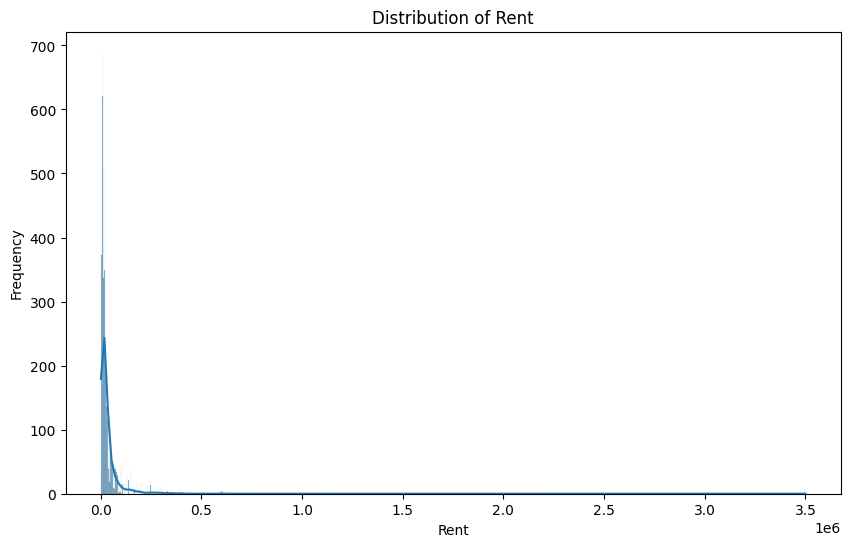

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the distribution of Rent
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Rent'], kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


# 2. What is the distribution of the size of the house?

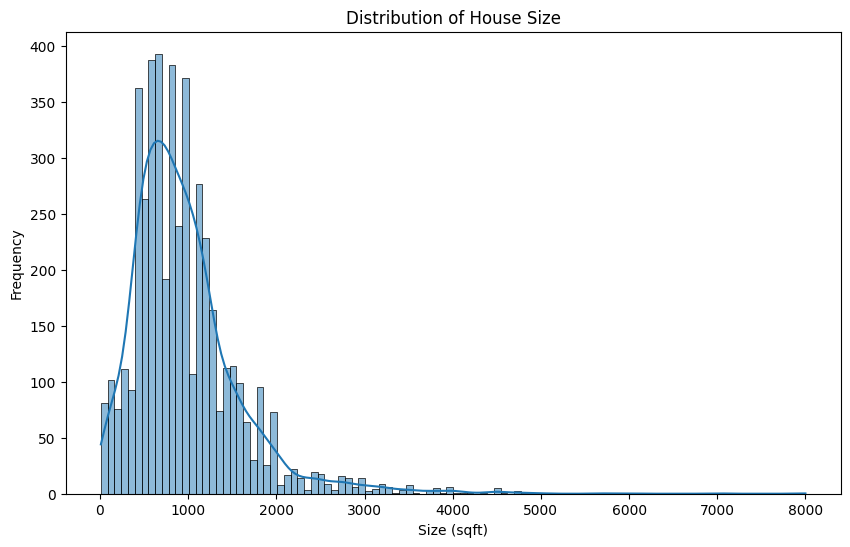

In [6]:
# Plotting the distribution of Size
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Size'], kde=True)
plt.title('Distribution of House Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()

# 3. What is the frequency of different Area Types?

In [7]:
# You can use .value_counts() to get the count of each unique value in a categorical column, followed by a bar plot to visualize the distribution.

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64


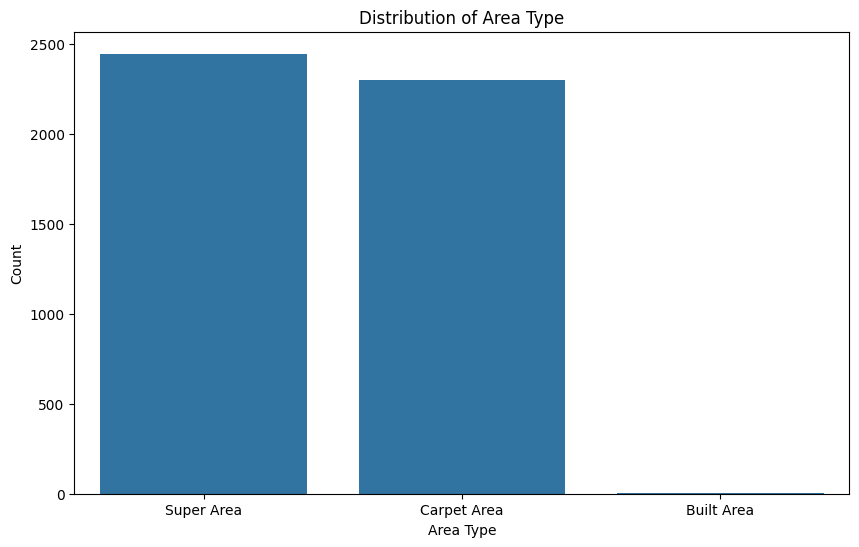

In [8]:
# Frequency of Area Type
print(dataset['Area Type'].value_counts())
# Plotting the distribution of Area Type
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['Area Type'])
plt.title('Distribution of Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()


# 4. How does the `Rent` vary by `Furnishing Status`

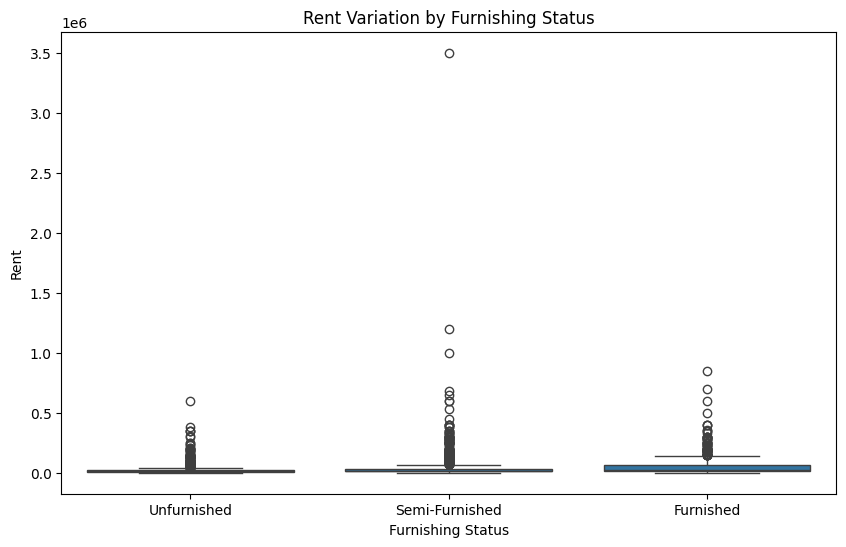

In [9]:
# Rent variation by Furnishing Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Furnishing Status', y='Rent', data=dataset)
plt.title('Rent Variation by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent')
plt.show()


# 5. How does the `Rent` vary by `BHK` (number of bedrooms)?

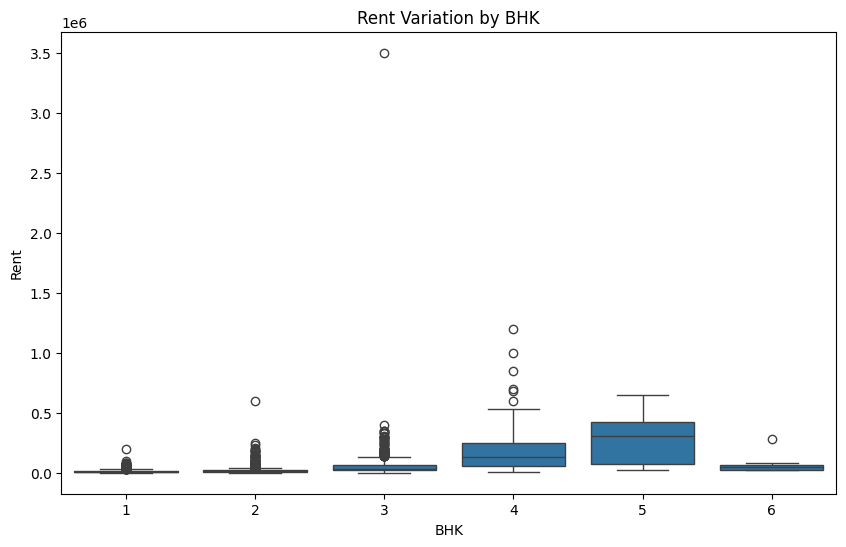

In [10]:
# Rent variation by BHK
plt.figure(figsize=(10, 6))
sns.boxplot(x='BHK', y='Rent', data=dataset)
plt.title('Rent Variation by BHK')
plt.xlabel('BHK')
plt.ylabel('Rent')
plt.show()


# 6. How does the rent vary with the area type?

In [11]:
# A boxplot is useful to compare the distribution of Rent across different categories of Area Type


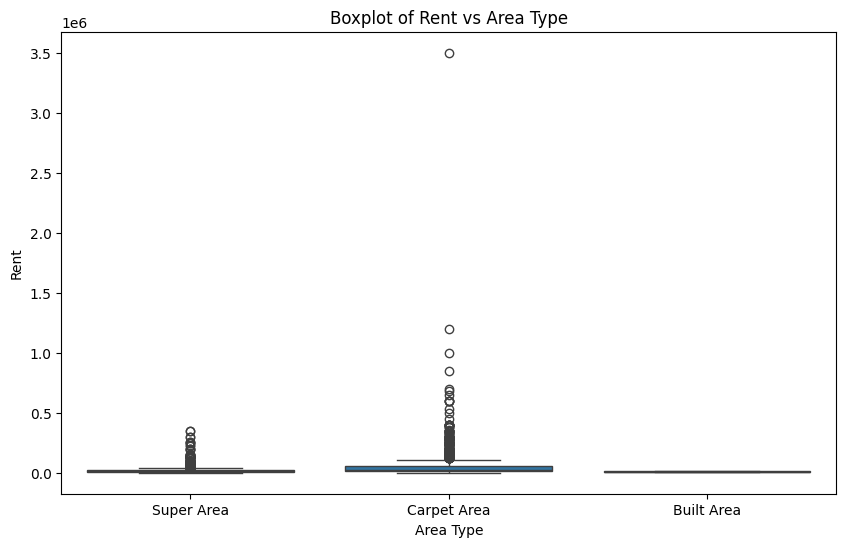

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Area Type'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Area Type')
plt.xlabel('Area Type')
plt.ylabel('Rent')
plt.show()

# 7. How does rent vary by city?

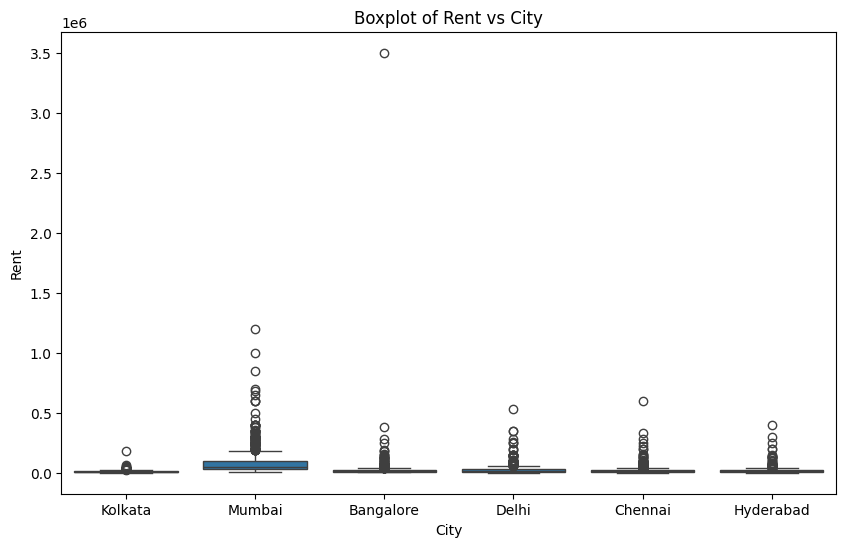

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['City'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs City')
plt.xlabel('City')
plt.ylabel('Rent')
plt.show()


# 8. What is the correlation (relationship) between Rent and Size?

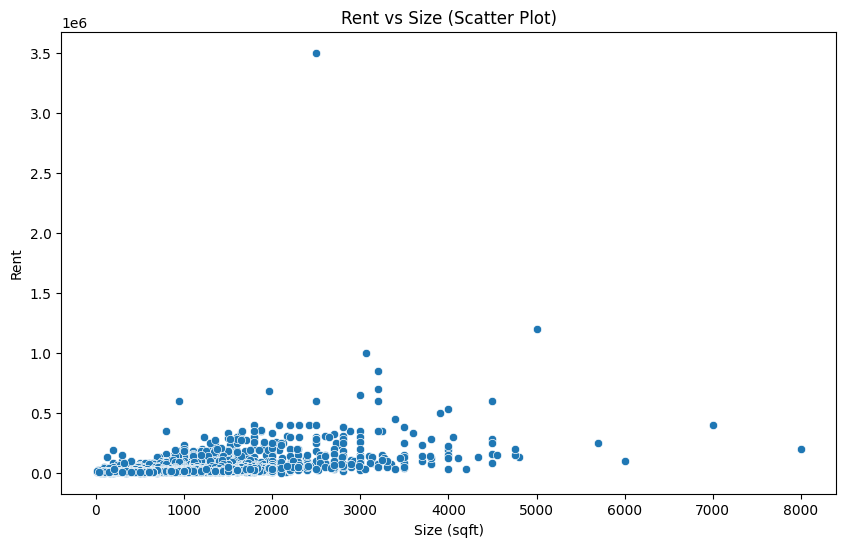

Correlation between Rent and Size: 0.4135507582245197


In [14]:
#Scatter plot of Rent vs Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Size'], y=dataset['Rent'])
plt.title('Rent vs Size (Scatter Plot)')
plt.xlabel('Size (sqft)')
plt.ylabel('Rent')
plt.show()

#Correlation coefficient
correlation = dataset[['Rent', 'Size']].corr()
print(f"Correlation between Rent and Size: {correlation.iloc[0, 1]}")

# 9.How does Rent change with Furnishing Status?

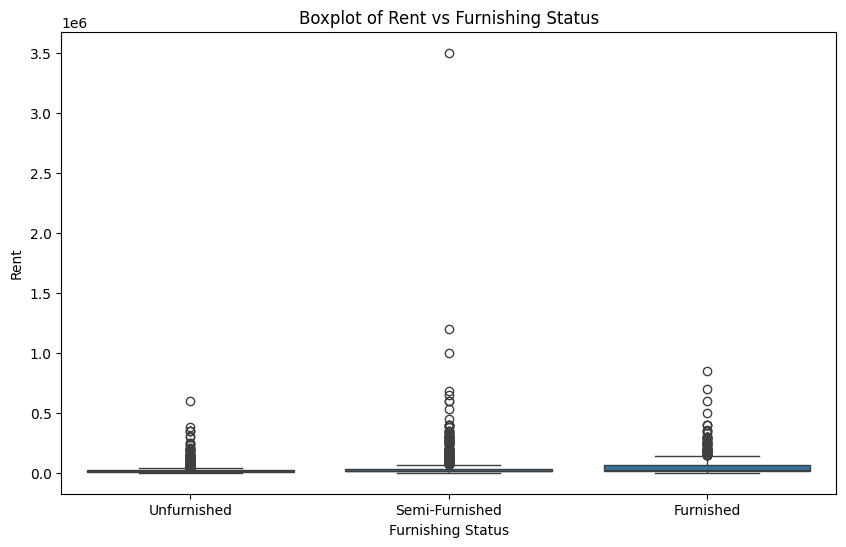

In [15]:
# Boxplot of Rent vs Furnishing Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Furnishing Status'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent')
plt.show()

# 10. How does `Rent` vary with the number of `Bathrooms`?

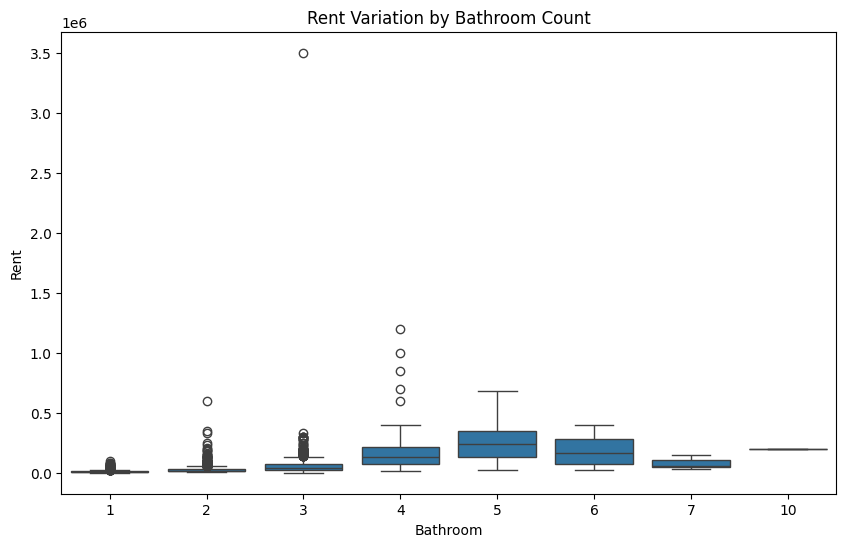

In [16]:
# Rent variation by Bathroom count
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bathroom', y='Rent', data=dataset)
plt.title('Rent Variation by Bathroom Count')
plt.xlabel('Bathroom')
plt.ylabel('Rent')
plt.show()

# 11.What is the relationship between Tenant Preferred and Rent?

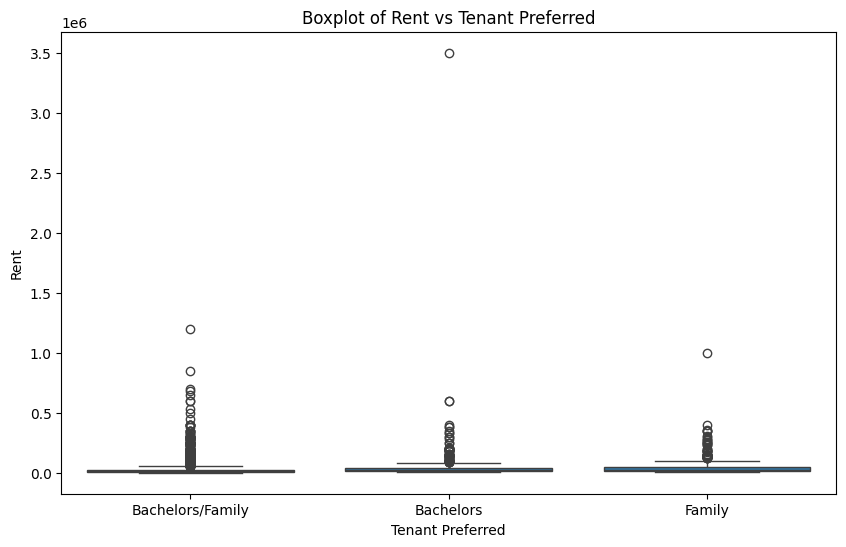

In [17]:
# Boxplot of Rent vs Tenant Preferred
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Tenant Preferred'], y=dataset['Rent'])
plt.title('Boxplot of Rent vs Tenant Preferred')
plt.xlabel('Tenant Preferred')
plt.ylabel('Rent')
plt.show()


# 12. What is the general distribution of the Size column?

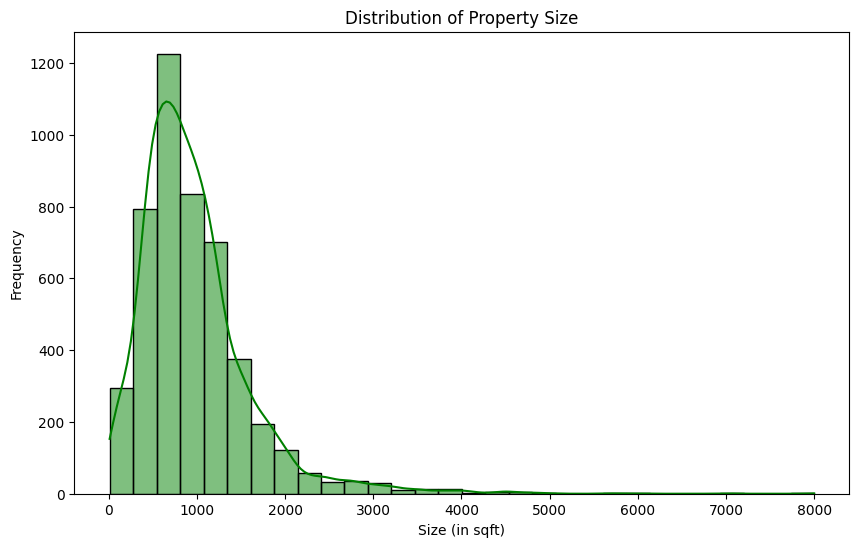

In [18]:
# Distribution of Size
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Size'], kde=True, color='green', bins=30)
plt.title('Distribution of Property Size')
plt.xlabel('Size (in sqft)')
plt.ylabel('Frequency')
plt.show()


# 13.How many properties are listed for each floor?

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
6 out of 29          1
28 out of 31         1
23 out of 30         1
4 out of 30          1
13 out of 25         1
Name: count, Length: 480, dtype: int64


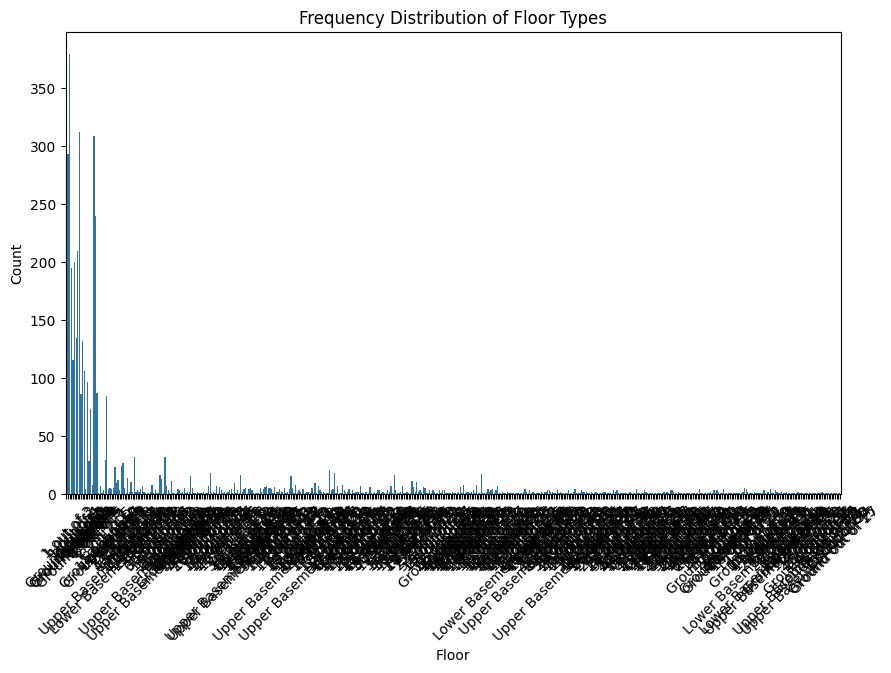

In [19]:
# Count the number of occurrences for each floor type
print(dataset['Floor'].value_counts())
# Plot the frequency distribution of floor types
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['Floor'])
plt.title('Frequency Distribution of Floor Types')
plt.xlabel('Floor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()